In [2]:
# importing matplotlib module
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

import sys
sys.path.append('..')

In [3]:
from tensegrity.plotter import MatplotlibPlotter
from tensegrity.structure import Structure

s = Structure(nodes=np.array([[1,0,0],[0,1,0],[0,0,1]]), members=[[0,1,2],[1,2,0]], number_of_strings = 1)
s.member_tags
s.get_element_by_tags(['bar', 'string'])

array([], dtype=uint64)

<Axes3D: >

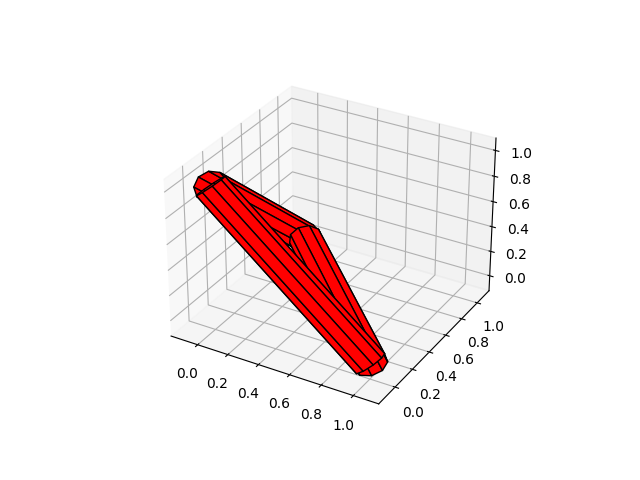

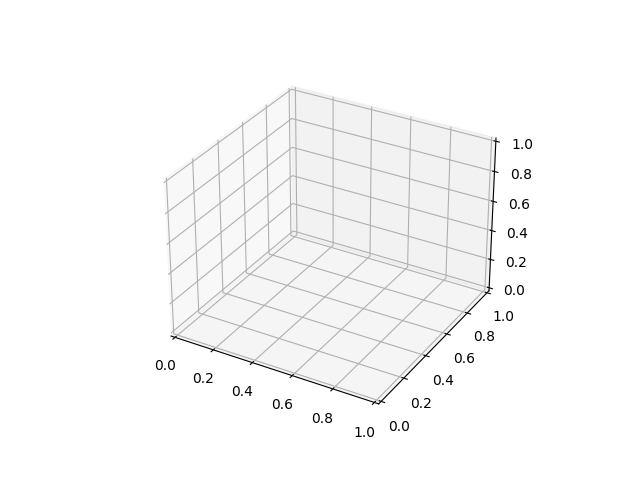

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plotter = MatplotlibPlotter(s)
plotter.plot(ax=ax)

In [ ]:
from typing import get_type_hints
hints = get_type_hints(Structure.MemberProperty)
df=pd.DataFrame(columns=hints.keys()).astype(dtype=hints)
df.set_index('member_id')

In [ ]:
df.dtypes

In [8]:
X = np.array([[1,2,3,4],[5,6,7,8]])
np.vstack((X[0,:],X[1,:])).T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])